In [1]:
#Assignment 1_Parametric tests_Python
#Oksana Goljevacki


In [3]:
#In a randomized control trial, 32 patients were divided into two groups: A and B. 
#Group A received test drug whereas group B received placebo. 
#The variable of interest was ‘Change in pain level’ measured by visual analogue scale (VAS)’
#before treatment and after 3 days of treatment.

In [55]:
#1.Import VAS DATA and name it as pain_vas. Check for normality of the data.
# Check normality for VAS_before and Vas_after
#1.Import VAS DATA and name it as pain_vas. Check for normality of the data.
import pandas as pd
pain_vas = pd.read_csv("C:/Users/datam/Desktop/CSVs/VAS DATA.csv")
print(pain_vas.head())
summary = pain_vas.describe()
print(summary)

from scipy.stats import shapiro

shapiro_before = shapiro(pain_vas['VAS_before'])
shapiro_after = shapiro(pain_vas['VAS_after'])
print("Shapiro-Wilk Test for VAS_before:", shapiro_before)
#Since p-value is >0.05,do not reject H0. Distribution of ‘VAS_before’ can be
#assumed to be normal.
print("Shapiro-Wilk Test for VAS_after:", shapiro_after)
#Since p-value is <0.05, reject H0. Distribution of ‘VAS_after’ appears to
#be non-normal.


  Group  VAS_before  VAS_after
0     A          86         71
1     A          77         59
2     A          75         44
3     A          83         49
4     A          72         32
       VAS_before  VAS_after
count   32.000000  32.000000
mean    75.156250  57.593750
std      6.107158  18.289534
min     61.000000  29.000000
25%     70.750000  39.500000
50%     75.000000  61.500000
75%     79.250000  73.000000
max     86.000000  86.000000
Shapiro-Wilk Test for VAS_before: ShapiroResult(statistic=0.9794088177164894, pvalue=0.7822327599210677)
Shapiro-Wilk Test for VAS_after: ShapiroResult(statistic=0.9104494392935774, pvalue=0.011548677578574112)


In [95]:
#2.Is post treatment VAS score significantly less as compared to ‘before treatment’ VAS score for Group A? 
import pandas as pd
from scipy.stats import ttest_rel
pain_vas = pd.read_csv("C:/Users/datam/Desktop/CSVs/VAS DATA.csv")
################################################################################
# Subset the data for Group A
groupA = pain_vas[pain_vas['Group'] == 'A']
from scipy import stats
stats.ttest_ind(pain_vas['VAS_before'],pain_vas['VAS_after'],nan_policy='omit',
equal_var=True)
#• Following hypotheses are tested in independent samples t test
# - H0: Two population means are equal
 #- H1: Two population means are not equal
#TtestResult(statistic=5.152334412772372, pvalue=2.8362848053804826e-06, df=62.0)
#Since p-value is <0.05,  reject H0. There is  significant
#difference in VAS score before treatment and VAS after treatment


TtestResult(statistic=5.152334412772372, pvalue=2.8362848053804826e-06, df=62.0)

In [97]:
#3.Is post treatment VAS score significantly less as compared to ‘before treatment’ VAS score for Group B? 
#When one variable (VAS_before) is normally distributed and the other (VAS_after) is not, 
#a good option would be the Wilcoxon signed-rank test

# Subset the data for Group B
from scipy.stats import wilcoxon
pain_vas = pd.read_csv("C:/Users/datam/Desktop/CSVs/VAS DATA.csv")
# Subset the data for Group B
groupB = pain_vas[pain_vas['Group'] == 'B']

# Perform the Wilcoxon signed-rank test
stat, P = wilcoxon(groupB['VAS_before'], groupB['VAS_after'], zero_method='wilcox', alternative='two-sided')

# Output the results
print("Test Statistic:", stat)
print("P:", p_value)

#Since p-value is >0.05,  accept H0. There is no significant
#difference in VAS score before treatment and VAS after treatment

Test Statistic: 30.0
P: 0.0506591796875


In [105]:
#4.Is the average change in pain level for group ‘A’ significantly more than group ‘B’? 
pain_vas = pd.read_csv("C:/Users/datam/Desktop/CSVs/VAS DATA.csv")


from scipy.stats import mannwhitneyu

# Ensure the correct columns are extracted from the DataFrame
VAS_before = pain_vas['VAS_before']
VAS_after = pain_vas['VAS_after']

# Perform the Mann-Whitney U test
stat, p_value = mannwhitneyu(VAS_before, VAS_after, alternative='greater')

# Print the results
print("Test Statistic:", stat)
print("P-value:", p_value)
#H0 No change in pain level for group ‘A’ and group ‘B’
#H1  Change in pain level for group ‘A’ significantly more than group ‘B’
#P-value: 5.020259295764042e-05  <0.05  therefore accept H1 .

Test Statistic: 802.0
P-value: 5.020259295764042e-05


<Figure size 1000x800 with 0 Axes>

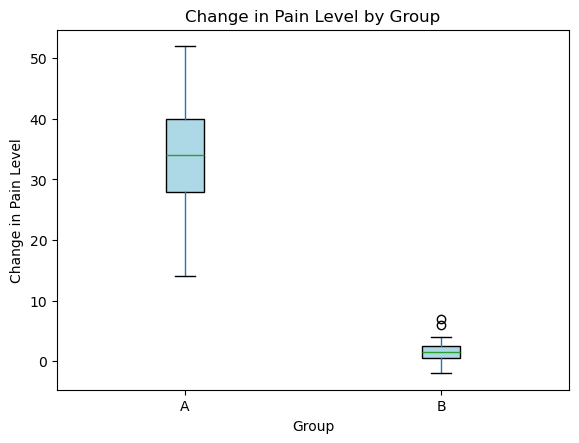

In [110]:
#5.Present change in pain level for each group using box-whisker plot.
import pandas as pd
import matplotlib.pyplot as plt
pain_vas = pd.read_csv("C:/Users/datam/Desktop/CSVs/VAS DATA.csv")
pain_vas['Change'] = pain_vas['VAS_before'] - pain_vas['VAS_after']

# Create the box-and-whisker plot
plt.figure(figsize=(10, 8))
pain_vas.boxplot(column='Change', by='Group', grid=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))

# Add labels and title
plt.title('Change in Pain Level by Group')
plt.suptitle('') 
plt.xlabel('Group')
plt.ylabel('Change in Pain Level')

# Show the plot
plt.show()
